<a href="https://colab.research.google.com/github/hildazaqya/project-capstone/blob/main/firna/Foodection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data from Kaggle

This data is collect mannually from many website, dan also in the data was captured using a smartphone camera.

In [2]:
#kaggle
!pip install kaggle

In [3]:
#this file from kaggle API personnal account
from google.colab import files

# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smjayyy","key":"a86a230a085a77cff7a5851725589584"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#link dataset in Kaggle.com
!kaggle datasets download -d alinesellwia/foodection-dataset

 99% 981M/994M [00:13<00:00, 78.8MB/s]
100% 994M/994M [00:13<00:00, 75.5MB/s]


In [6]:
#new directory for stores temporary data
!mkdir data

In [7]:
#unzip the data
!unzip -q foodection-dataset.zip -d data/datasetfull

#Install Library

In [8]:
#Train Data, Augmentation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#interach with OS -> make directory
import os

#Visualization
%matplotlib inline

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Set the directory to easily navigate to the generator

In [9]:
base_dir= '/content/data/datasetfull/Foodection Dataset'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['test', 'train']

Contents of train directory:
['wortel_wegar', 'jeruk_busuk', 'wortel_busuk', 'jeruk_segar_sedang', 'tomat_segar_sedang', 'tomat_segar', 'jeruk_segar', 'wortel_segar_sedang', 'tomat_busuk']

Contents of validation directory:
['wortel_segar', 'jeruk_busuk', 'wortel_busuk', 'tomat _segar_sedang', 'jeruk_segar_sedang', 'tomat_segar', 'jeruk_segar', 'wortel_segar_sedang', 'tomat_busuk']


In [10]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Specify class of the directory train
train_jeruksegar_dir = os.path.join(train_dir, 'jeruk_segar')
train_wortelsegar_dir = os.path.join(train_dir, 'wortel_wegar')
train_wortelsegarsedang_dir = os.path.join(train_dir, 'wortel_wegar')
train_tomatbusuk_dir = os.path.join(train_dir, 'tomat_busuk')
train_jeruksegarsedang_dir = os.path.join(train_dir, 'jeruk_segar_sedang')
train_jerukbusuk_dir = os.path.join(train_dir, 'jeruk_busuk')
train_wortelbusuk_dir = os.path.join(train_dir, 'wortel_busuk')
train_tomatsegar_dir = os.path.join(train_dir, 'tomat_segar')
train_tomatsegarsedang_dir = os.path.join(train_dir, 'tomat_segar_sedang')

# Specify class of the directory test
test_jeruksegar_dir = os.path.join(test_dir, 'jeruk_segar')
test_wortelsegar_dir = os.path.join(test_dir, 'wortel_segar')
test_wortelsegarsedang_dir = os.path.join(test_dir, 'wortel_segar_sedang')
test_tomatbusuk_dir = os.path.join(test_dir, 'tomat_busuk')
test_jeruksegarsedang_dir = os.path.join(test_dir, 'jeruk_segar_sedang')
test_jerukbusuk_dir = os.path.join(test_dir, 'jeruk_busuk')
test_wortelbusuk_dir = os.path.join(test_dir, 'wortel_busuk')
test_tomatsegar_dir = os.path.join(test_dir, 'tomat_segar')
test_tomatsegarsedang_dir = os.path.join(test_dir, 'tomat _segar_sedang')

In [11]:
train_jeruksegar_fnames = os.listdir(train_jeruksegar_dir)
train_wortelsegar_fnames = os.listdir(train_wortelsegar_dir)
train_wortelsegarsedang_fnames = os.listdir(train_wortelsegarsedang_dir)
train_tomatbusuk_fnames = os.listdir(train_tomatbusuk_dir)
train_jeruksegarsedang_fnames = os.listdir(train_jeruksegarsedang_dir)
train_jerukbusuk_fnames = os.listdir(train_jerukbusuk_dir)
train_wortelbusuk_fnames = os.listdir(train_wortelbusuk_dir)
train_tomatsegar_fnames = os.listdir(train_tomatsegar_dir)
train_tomatsegarsedang_fnames = os.listdir(train_tomatsegarsedang_dir)

print(train_jeruksegar_fnames[:10])
print(train_wortelsegar_fnames[:10])

['jeruk (1042).png', 'jeruk (240).png', 'jeruk (997).png', 'jeruk (925).png', 'jeruk (828).png', 'jeruk (993).png', 'jeruk (204).png', 'jeruk (927).png', 'jeruk (429).png', 'jeruk (1182).png']
['0532.jpg', '1026.jpg', '0543.jpg', '1263.jpg', '0360.jpg', '1272.jpg', '1332.jpg', '0448.jpg', '0790.jpg', '0815.jpg']


# Every Class Len

In [12]:
print('total training jeruk segar images :', len(os.listdir(train_jeruksegar_dir)))
print('total training wortel segar images :', len(os.listdir( train_wortelsegar_dir)))
print('total training wortel segar sedang images :', len(os.listdir(train_wortelsegarsedang_dir)))
print('total training tomat busuk images :', len(os.listdir(train_tomatbusuk_dir)))
print('total training jeruk segar sedang images :', len(os.listdir(train_jeruksegarsedang_dir)))
print('total training jeruk busuk images :', len(os.listdir(train_jerukbusuk_dir)))
print('total training wortel busuk images :', len(os.listdir(train_wortelbusuk_dir)))
print('total training tomat segar images :', len(os.listdir(train_tomatsegar_dir)))
print('total training tomat segar sedang images :', len(os.listdir(train_tomatsegarsedang_dir)))

print('total testing jeruk segar images :', len(os.listdir(test_jeruksegar_dir)))
print('total testing wortel segar images :', len(os.listdir(test_wortelsegar_dir)))
print('total testing wortel segar sedang images :', len(os.listdir(test_wortelsegarsedang_dir)))
print('total testing tomat busuk images :', len(os.listdir(test_tomatbusuk_dir)))
print('total testing jeruk segar sedang images :', len(os.listdir(test_jeruksegarsedang_dir)))
print('total testing jeruk busuk images :', len(os.listdir(test_jerukbusuk_dir)))
print('total testing wortel busuk images :', len(os.listdir(test_wortelbusuk_dir)))
print('total testing tomat segar images :', len(os.listdir(test_tomatsegar_dir)))
print('total testing tomat segar sedang images :', len(os.listdir(test_tomatsegarsedang_dir)))

total training jeruk segar images : 1368
total training wortel segar images : 1114
total training wortel segar sedang images : 1114
total training tomat busuk images : 1002
total training jeruk segar sedang images : 693
total training jeruk busuk images : 1280
total training wortel busuk images : 183
total training tomat segar images : 1185
total training tomat segar sedang images : 169
total testing jeruk segar images : 317
total testing wortel segar images : 279
total testing wortel segar sedang images : 40
total testing tomat busuk images : 85
total testing jeruk segar sedang images : 173
total testing jeruk busuk images : 319
total testing wortel busuk images : 45
total testing tomat segar images : 204
total testing tomat segar sedang images : 42


#Check With Visualization

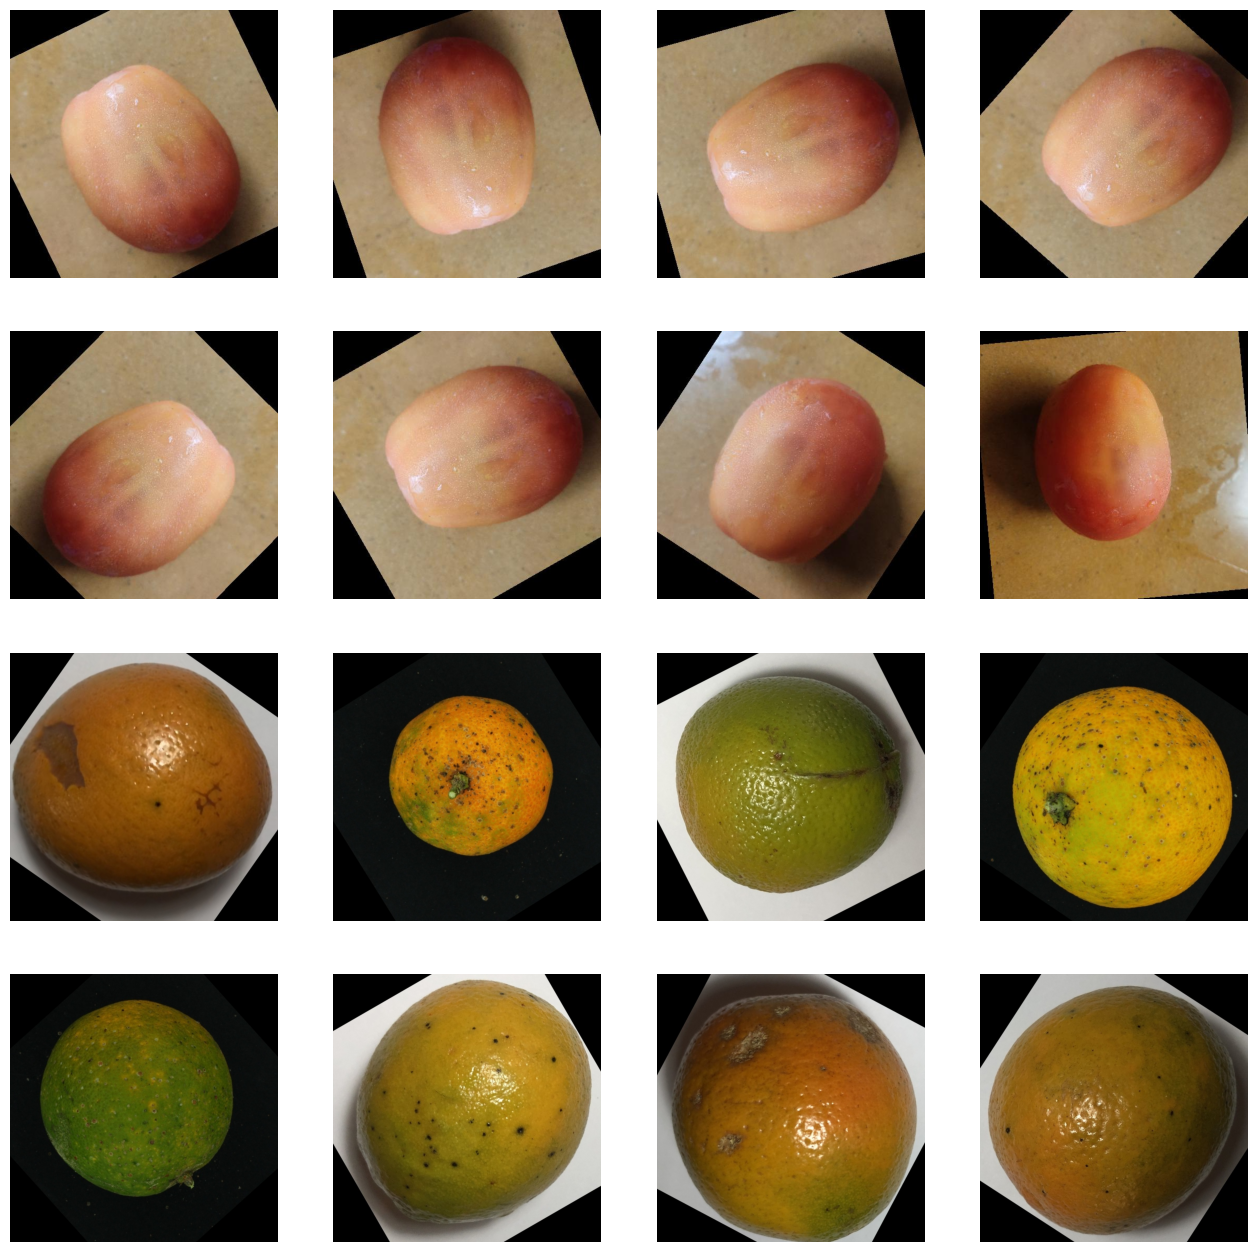

In [13]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0  # Add a line break here

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_tomatsegarsedang_pix = [os.path.join(train_tomatsegarsedang_dir, fname)
                            for fname in train_tomatsegarsedang_fnames[pic_index - 8:pic_index]
                            ]

next_jeruksegarsedang_pix = [os.path.join(train_jeruksegarsedang_dir, fname)
                            for fname in train_jeruksegarsedang_fnames[pic_index - 8:pic_index]
                            ]

for i, img_path in enumerate(next_tomatsegarsedang_pix  + next_jeruksegarsedang_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

#Make Augmentation

In [24]:
img_height = 150
img_width = 150
img_channels = 3
num_epochs = 10

train_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator= train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 7099 images belonging to 9 classes.
Found 1503 images belonging to 9 classes.


CNN-3 Model

In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, img_channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(train_generator, epochs=num_epochs, validation_data=test_generator)

Epoch 1/10
355/355 [==============================] - 46s 127ms/step - loss: 0.7561 - accuracy: 0.7398 - val_loss: 2.9242 - val_accuracy: 0.3706
Epoch 2/10
355/355 [==============================] - 46s 131ms/step - loss: 0.3988 - accuracy: 0.8690 - val_loss: 4.3630 - val_accuracy: 0.3866
Epoch 3/10
355/355 [==============================] - 46s 130ms/step - loss: 0.2392 - accuracy: 0.9229 - val_loss: 4.2888 - val_accuracy: 0.3446
Epoch 4/10
355/355 [==============================] - 47s 131ms/step - loss: 0.1507 - accuracy: 0.9514 - val_loss: 5.2386 - val_accuracy: 0.4385
Epoch 5/10
355/355 [==============================] - 46s 129ms/step - loss: 0.1048 - accuracy: 0.9659 - val_loss: 6.4396 - val_accuracy: 0.4032
Epoch 6/10
355/355 [==============================] - 45s 128ms/step - loss: 0.0810 - accuracy: 0.9745 - val_loss: 8.0812 - val_accuracy: 0.4424
Epoch 7/10
355/355 [==============================] - 45s 126ms/step - loss: 0.0655 - accuracy: 0.9790 - val_loss: 8.2371 - val_ac

Model Description Experiment :

1. CNN-3
   * epoch 10
   * batch size 20
   * augmentation rescale(val and train)
   * no drop out